In [195]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up(stepup=2)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import analysis2 as a2
from flutype.models import Spot
import django
django.setup()
from importlib import reload
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing

## Load Elisa Data

In [196]:
reload(a2)
studies = ["elisa_2018_04_23"]

spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
data_elisa = a2.Data(spots_dj=spots_dj)


In [197]:

ma = data_elisa.mean_on_analyte_batch().groupby(["Analyte Batch"]).mean()["Intensity_rsd"]

In [198]:
ma

Analyte Batch
A/Aichi/2/68(H3N2)-4-10            0.471204
A/California/07/2009(H1N1)-3-10    0.441552
A/Panama/2007/1999(H3N2)-3-10      0.506438
Buffer001                          0.495531
Name: Intensity_rsd, dtype: float64

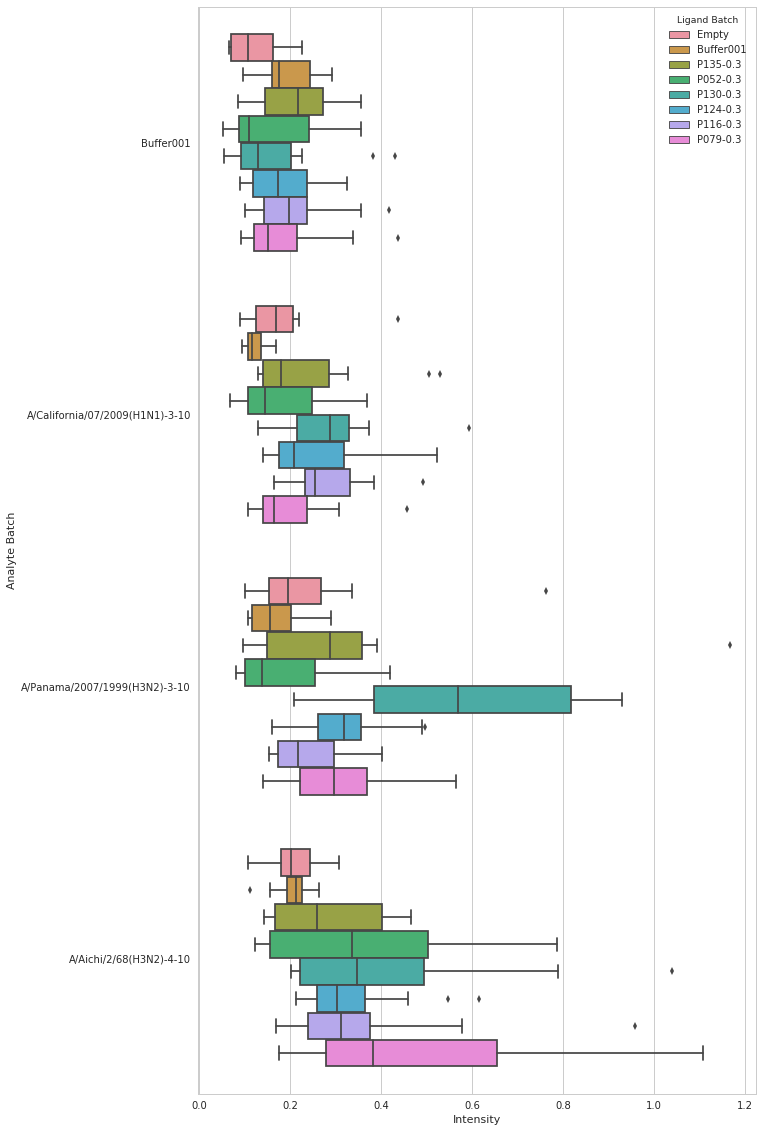

In [164]:
fig ,ax = plt.subplots(ncols=1,nrows=1,figsize=(10,20))
sns.boxplot(data=data_elisa.spots_pd, x="Intensity", y="Analyte Batch", hue="Ligand Batch", ax=ax,)

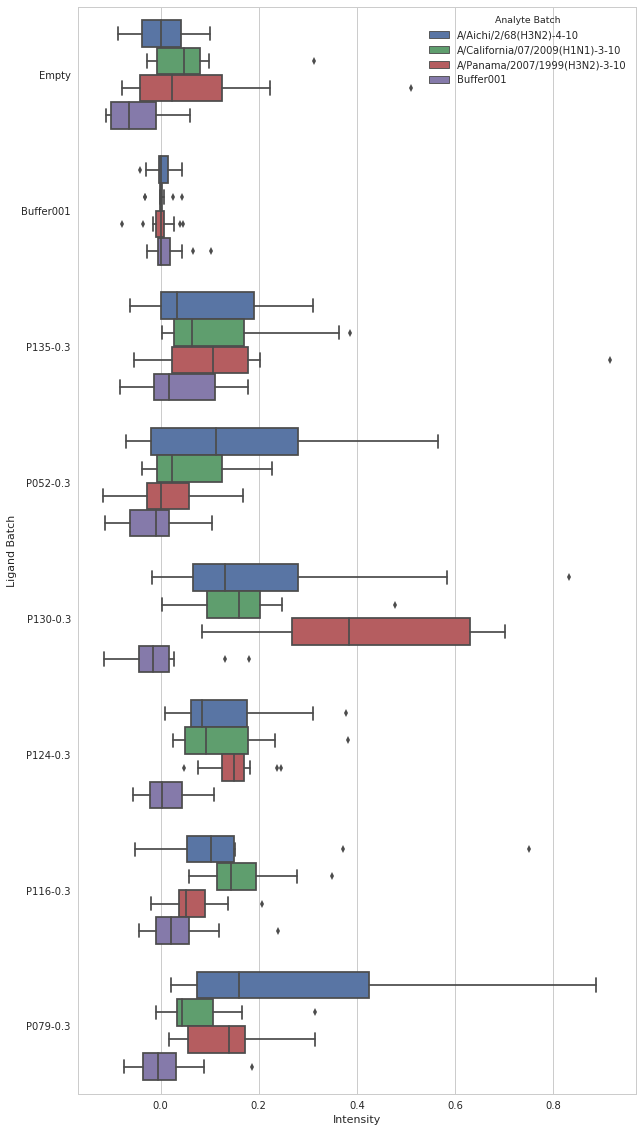

In [172]:
fig ,ax = plt.subplots(ncols=1,nrows=1,figsize=(10,20))
sns.boxplot(data=data_elisa.spots_pd, x="Intensity", y="Ligand Batch", hue="Analyte Batch", ax=ax,)


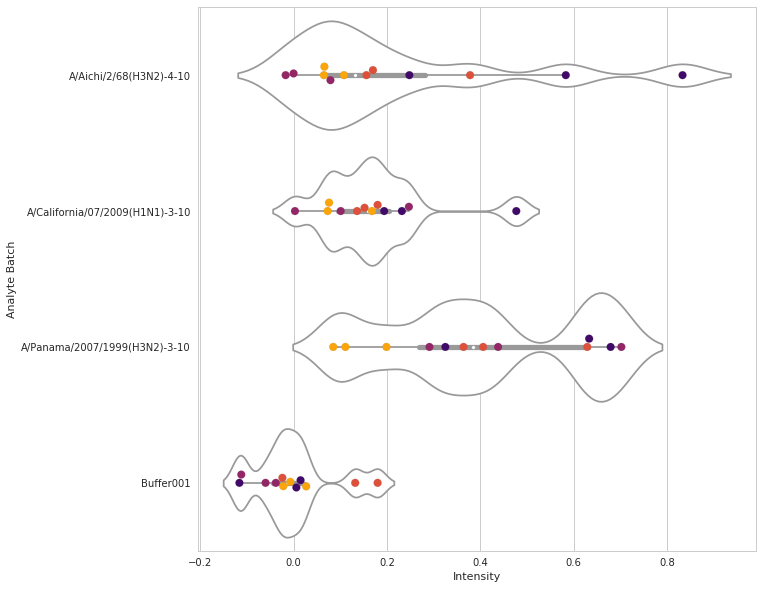

In [173]:
d = data_elisa
d = d.subset_ligand_batches(["P130-0.3"])
fig ,ax = plt.subplots(figsize=(10,10))

ax = sns.violinplot(y="Analyte Batch",
                    x="Intensity",
                    bw=.2, 
                    #hue="Collection",
                    scale="width", 
                    data=d.spots_pd.sort_values(by=["Analyte Batch", "Collection"]),
                    #split=True,
                    color="white",

                    )
ax = sns.swarmplot(y="Analyte Batch",
                   hue="Collection", 
                   x="Intensity",
                   palette=sns.color_palette("inferno",n_colors=4),
                   #color="white",
                   data=d.spots_pd.sort_values(by=["Analyte Batch", "Collection"]),
                   size=8,
                   #split=True,
                   edgecolor="grey",
                   linewidth=0.1,)
        
ax.legend_.remove()
plt.show()

In [179]:
data_elisa.mean_on_collection()

/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/preprocessing.py:109: RuntimeWarning:

divide by zero encountered in double_scalars



,Ligand Batch,Collection,Study,Analyte Batch,Ligand Batch Concentration,Analyte Batch Concentraion,Intensity,Std,Circle Quality,Row,Column,Replica,Count,Intensity_std,Intensity_var,Intensity_rsd
0,Buffer001,2018_04_23-1,elisa_2018_04_23,A/Aichi/2/68(H3N2)-4-10,NaN,10.0,0.003000,NaN,NaN,7.0,2.0,4.0,3.0,0.006245,1.170000e-04,3.605551
1,Buffer001,2018_04_23-1,elisa_2018_04_23,A/California/07/2009(H1N1)-3-10,NaN,10.0,0.014333,NaN,NaN,7.0,8.0,4.0,3.0,0.014333,6.163333e-04,1.732051
2,Buffer001,2018_04_23-1,elisa_2018_04_23,A/Panama/2007/1999(H3N2)-3-10,NaN,10.0,0.001333,NaN,NaN,7.0,5.0,4.0,3.0,0.021949,1.445333e-03,28.513155
3,Buffer001,2018_04_23-1,elisa_2018_04_23,Buffer001,NaN,NaN,0.002333,NaN,NaN,7.0,11.0,4.0,3.0,0.005044,7.633333e-05,3.744384
4,Buffer001,2018_04_23-2,elisa_2018_04_23,A/Aichi/2/68(H3N2)-4-10,NaN,10.0,0.013667,NaN,NaN,7.0,2.0,7.0,3.0,0.015191,6.923333e-04,1.925285
5,Buffer001,2018_04_23-2,elisa_2018_04_23,A/California/07/2009(H1N1)-3-10,NaN,10.0,-0.008333,NaN,NaN,7.0,8.0,7.0,3.0,0.012005,4.323333e-04,-2.495115
6,Buffer001,2018_04_23-2,elisa_2018_04_23,A/Panama/2007/1999(H3N2)-3-10,NaN,10.0,0.013000,NaN,NaN,7.0,5.0,7.0,3.0,0.016623,8.290000e-04,2.214797
7,Buffer001,2018_04_23-2,elisa_2018_04_23,Buffer001,NaN,NaN,0.025000,NaN,NaN,7.0,11.0,7.0,3.0,0.039281,4.629000e-03,2.721470
8,Buffer001,2018_04_23-3,elisa_2018_04_23,A/Aichi/2/68(H3N2)-4-10,NaN,10.0,-0.004333,NaN,NaN,7.0,2.0,1.0,3.0,0.013740,5.663333e-04,-5.491791
9,Buffer001,2018_04_23-3,elisa_2018_04_23,A/California/07/2009(H1N1)-3-10,NaN,10.0,-0.002000,NaN,NaN,7.0,8.0,1.0,3.0,0.016197,7.870000e-04,-14.026760


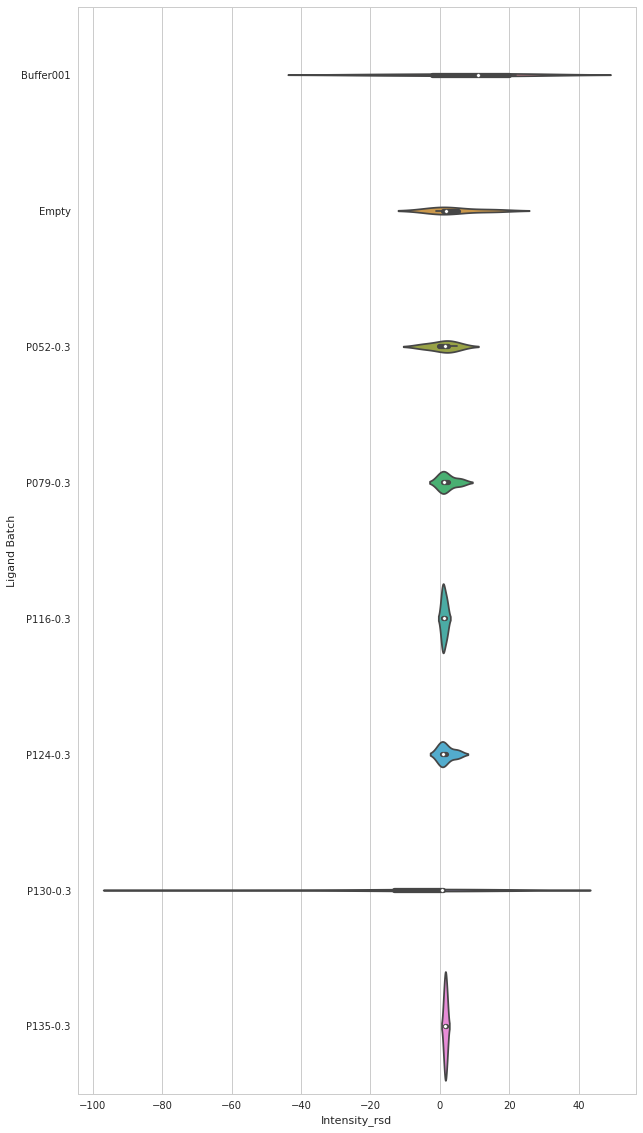

In [181]:
fig ,ax = plt.subplots(ncols=1,nrows=1,figsize=(10,20))
#sns.violinplot(data=data_elisa.mean_on_collection().dropna(),color="white",
#x="Intensity_rsd", y="Ligand Batch", ax=ax)
sns.violinplot(data=data_elisa.mean_on_analyte_batch(), x="Intensity_rsd", y="Ligand Batch", ax=ax)

#sns.violinplot(data=data_elisa.mean_on_analyte_batch(), x="Intensity_rsd", y="Analyte Batch", ax=ax)

## Normalization by Analyte Buffer


In [199]:
frames = {}
for cn, d in  data_elisa.spots_pd.groupby(["Collection","Analyte Batch"]):
    d["Intensity"] = d["Intensity"]/d[d["Ligand Batch"] == "Buffer001"]["Intensity"].median()
    frames[cn]=d
spots_pd_norm = pd.concat(frames)
data_elisa_norm1 = a2.Data(spots_pd=spots_pd_norm)

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



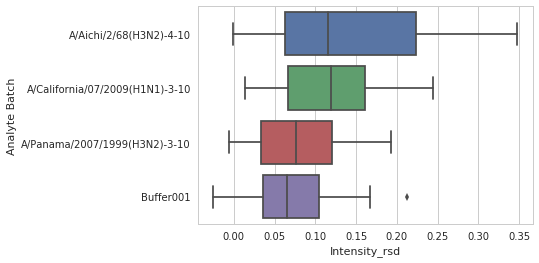

In [211]:
ma = data_elisa_norm1.mean_on_analyte_batch().groupby(["Analyte Batch","Ligand Batch"]).mean()["Intensity_rsd"]
ma
mc = data_elisa_norm1.mean_on_collection().groupby(["Analyte Batch", "Ligand Batch"]).mean()["Intensity_rsd"]
mc
sns.boxplot(data=(ma-mc).reset_index(),y="Analyte Batch",x="Intensity_rsd")

Selected Peptide have rather low relevance. This is bad.

## Normalization by Ligand Buffer


In [201]:
frames = {}
for cn, d in  data_elisa.spots_pd.groupby(["Collection","Ligand Batch"]):
    d["Intensity"] = d["Intensity"]/d[d["Analyte Batch"] == "Buffer001"]["Intensity"].median()
    frames[cn]=d
spots_pd_norm = pd.concat(frames)
data_elisa_norm2 = a2.Data(spots_pd=spots_pd_norm)

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [202]:
ma = data_elisa_norm2.mean_on_analyte_batch().groupby(["Analyte Batch"]).mean()["Intensity_rsd"]
ma

Analyte Batch
A/Aichi/2/68(H3N2)-4-10            0.492981
A/California/07/2009(H1N1)-3-10    0.372809
A/Panama/2007/1999(H3N2)-3-10      0.569053
Buffer001                          0.334114
Name: Intensity_rsd, dtype: float64

In [203]:
frames = {}
for cn, d in  data_elisa_norm1.spots_pd.groupby(["Collection","Ligand Batch"]):
    d["Intensity"] = d["Intensity"]/d[d["Analyte Batch"] == "Buffer001"]["Intensity"].median()
    frames[cn]=d
spots_pd_norm = pd.concat(frames)
data_elisa_norm3 = a2.Data(spots_pd=spots_pd_norm)

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [204]:
ma = data_elisa_norm3.mean_on_analyte_batch().groupby(["Analyte Batch"]).mean()["Intensity_rsd"]
ma

Analyte Batch
A/Aichi/2/68(H3N2)-4-10            0.500375
A/California/07/2009(H1N1)-3-10    0.380039
A/Panama/2007/1999(H3N2)-3-10      0.492059
Buffer001                          0.334114
Name: Intensity_rsd, dtype: float64

Analyte Batch
A/Aichi/2/68(H3N2)-4-10            0.281881
A/California/07/2009(H1N1)-3-10    0.271363
A/Panama/2007/1999(H3N2)-3-10      0.272218
Buffer001                          0.302604
Name: Intensity_rsd, dtype: float64

## Check concentration dependence in elisa data set

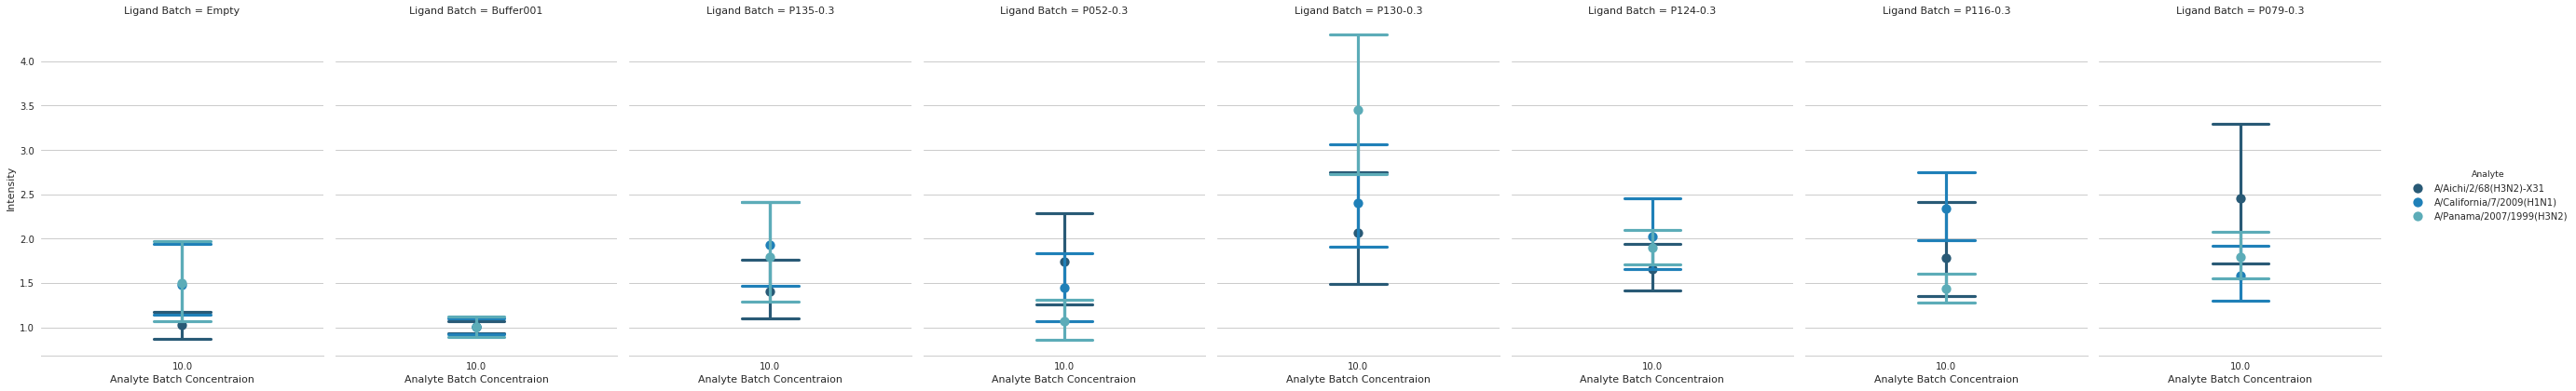

In [126]:
sns.set(style="whitegrid")
g = sns.factorplot(x="Analyte Batch Concentraion", y="Intensity", hue="Analyte", col="Ligand Batch", data=data_elisa.spots_pd,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)

 - Concentration of Analyte Batch has no dependece on the Intensity for Ligand Batch == Buffer. This is good
 - qualitativ: correct relation between Concentration and Intensity


Question 1: How to normalize? 

 ## Correlation Plots

In [127]:
cmap = matplotlib.cm.get_cmap('Accent')

In [128]:
colors =  cmap(np.linspace(0,1,num=6))
color_list = []
for color in colors:
    for i in range(3):
        color_list.append(color)
color_list += [np.array([0 ,0 , 0, 0]) ]

Correlation of Peptides (check if viruses cluster in any corplot)
-  x -> Buffer 
- d -> 5 Concentration
- o -> 10 Concentration
- s -> 20 Concentration

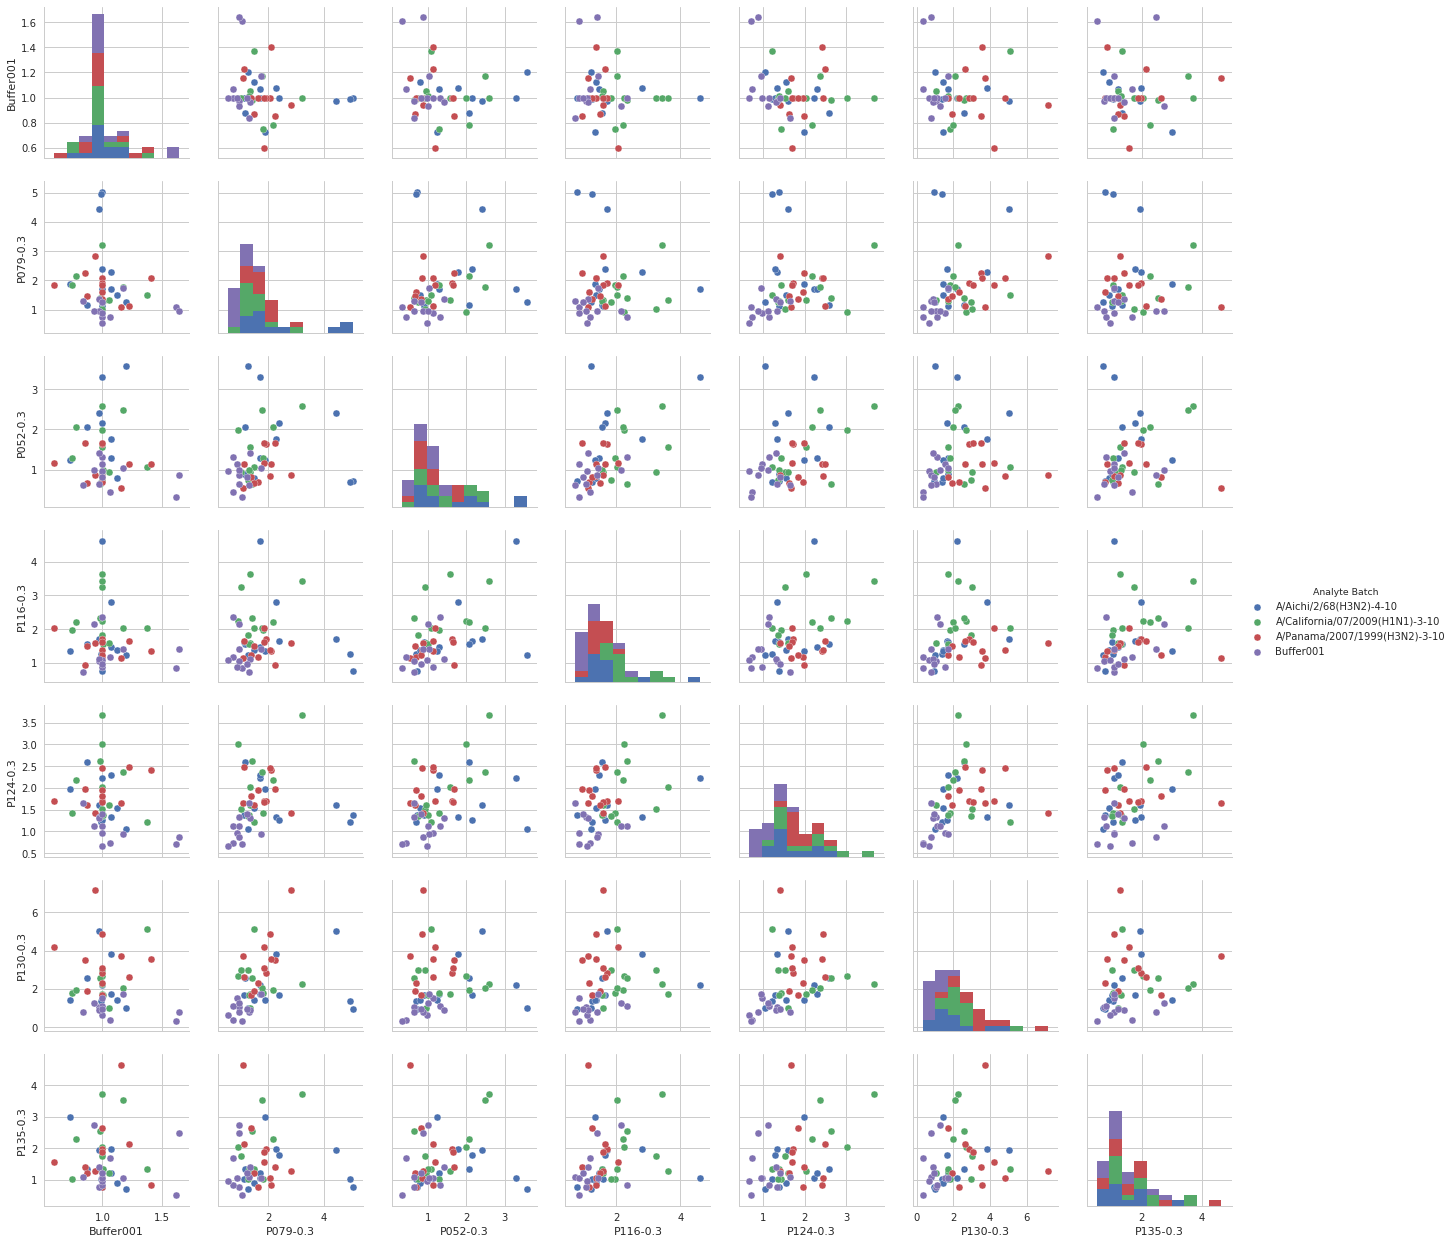

In [129]:
sns.pairplot(data=data_elisa.x.reset_index(),vars=["Buffer001","P079-0.3","P052-0.3","P116-0.3","P124-0.3","P130-0.3","P135-0.3"],hue="Analyte Batch")#,palette=color_list)#,markers= 6*["o","s","D"]+["x"])

In [130]:
d_analayte_x = data_elisa.spots_pd.pivot_table(values="Intensity",columns=["Ligand Batch","Analyte Batch Concentraion", "Replica"], index=["Analyte"])
d_new = d_analayte_x.transpose()

In [131]:

colors =  cmap(np.linspace(0,1,num=3))
color_list = []
for color in colors:
    #for i in range(3):
        color_list.append(color)
color_list += [np.array([0 ,0 , 0, 0]) ]

Correlation of Virsues 

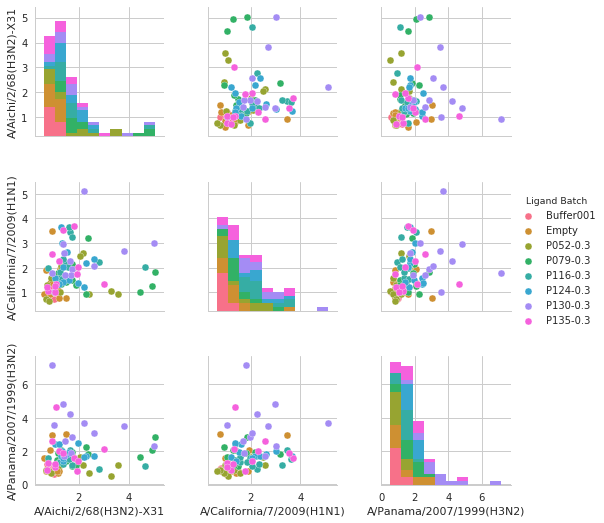

In [132]:
sns.pairplot(data=d_new.reset_index(), hue="Ligand Batch", vars=['A/Aichi/2/68(H3N2)-X31',  'A/California/7/2009(H1N1)', 'A/Panama/2007/1999(H3N2)'])

## Heat/Cluster Map

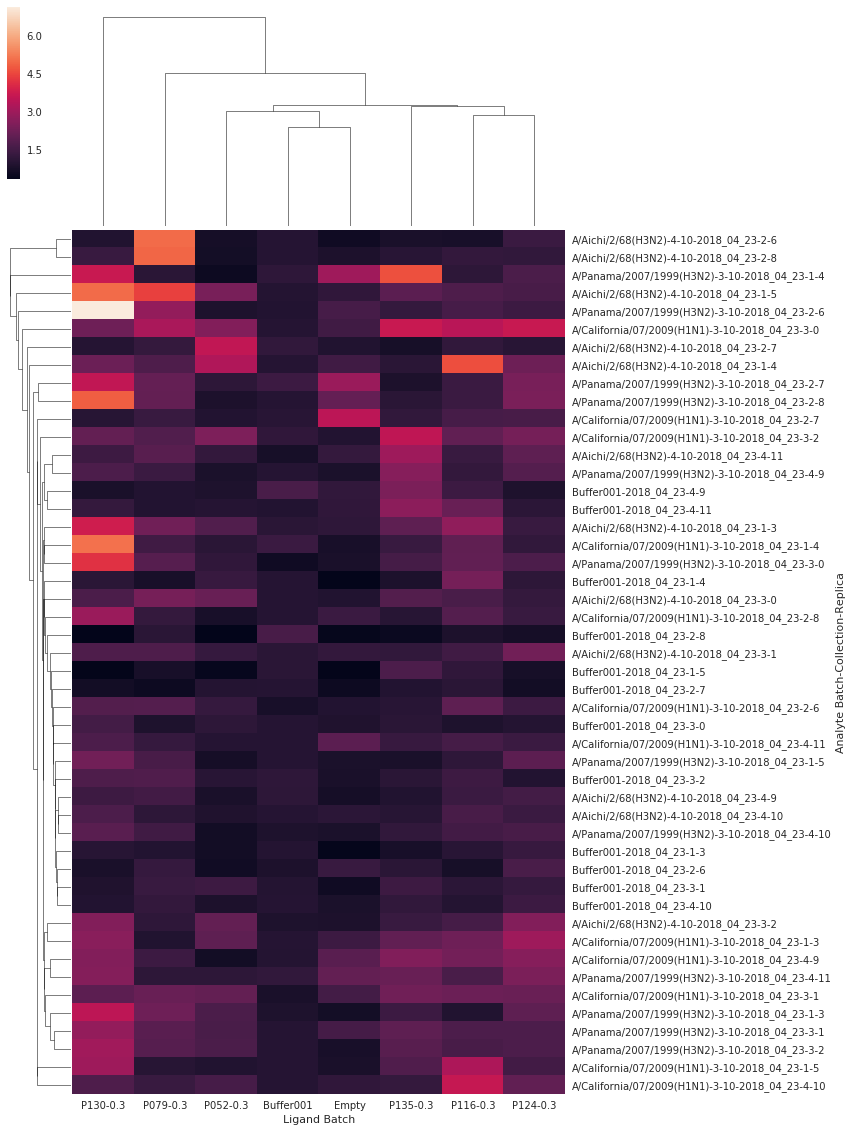

In [133]:
sns.clustermap(data_elisa.x,  method="single",figsize=(10,20))#metric="correlation",

## pca

In [134]:
#artificially increase data size
data_elisa_a = data_elisa.sample_on_collection(20)
# not used further

In [182]:
model_pca = data_elisa.x_pca_fit()
elisa_pca = model_pca.transform(data_elisa.x)

In [183]:
model_pca.scalings_

AttributeError: 'PCA' object has no attribute 'scalings_'

In [184]:
# creating colors for pca
le = preprocessing.LabelEncoder()
le.fit(data_elisa.y_names)
cs = le.transform(data_elisa.y_names)
colors =cs.astype(float) / cs.max()

In [186]:
trace1 = go.Scatter3d(
    x=elisa_pca[:,0],
    y=elisa_pca[:,1],
    z=elisa_pca[:,2],
    text = data_elisa.y_names+"<br>"+data_elisa.x.index.get_level_values("Collection"),
    mode='markers',
    hoverinfo='text',
    #hoverlabel=dict(bgcolor=list(colors)),
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.99)
)

this = [trace1]
layout = go.Layout(
    #scene=dict(
    #    xaxis = dict(showspikes=False),
    #    yaxis = dict(showspikes=False),
    #    zaxis = dict(showspikes=False),

        

     #   )
    )
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [118]:
complete = pd.DataFrame(columns=["Test", "Train"])
com = data_elisa.collections.unique().values
for i in range(1):
    complete.set_value(i,"Test",com)
    complete.set_value(i,"Train",com)



/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [140]:
#no cross-validation on different microwells possible possible without 
ana = a2.Analysis(data_elisa, train_test=complete)
ana.calculate_all()

*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****


In [141]:
frame = ana.complete_information()
len_frame =int(len(frame)/3)
frame_NN = frame[:len_frame]
frame_DT = frame[len_frame:2*len_frame]
frame_LR = frame[2*len_frame:3*len_frame]
print(frame_NN["TrueFalse"].mean())

0.7291666666666666


## Nearest Neighbors

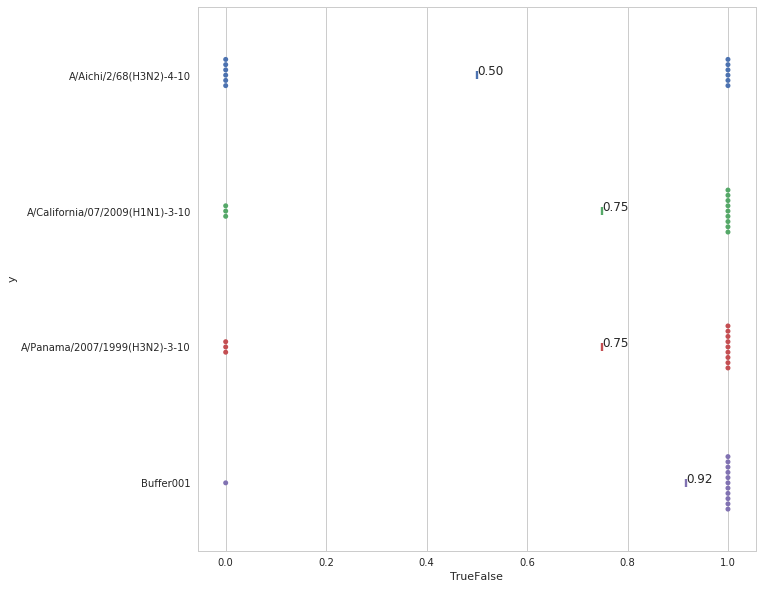

In [142]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))
#ax = sns.boxplot(data=frame_NN,y="y",x="TrueFalse",notch=True)
ax = sns.pointplot(data=frame_NN,y="y",x="TrueFalse",ci=None, join=False,hue="y", markers="|",)
for c in ax.collections:
    for of in c.get_offsets():
        ax.annotate("{:.2f}".format(of[0]), of)
        
ax = sns.swarmplot(data=frame_NN,y="y",x="TrueFalse")#, jitter=0.5)#, aspect=0.8)
ax.legend_.remove()

## Decision Tree

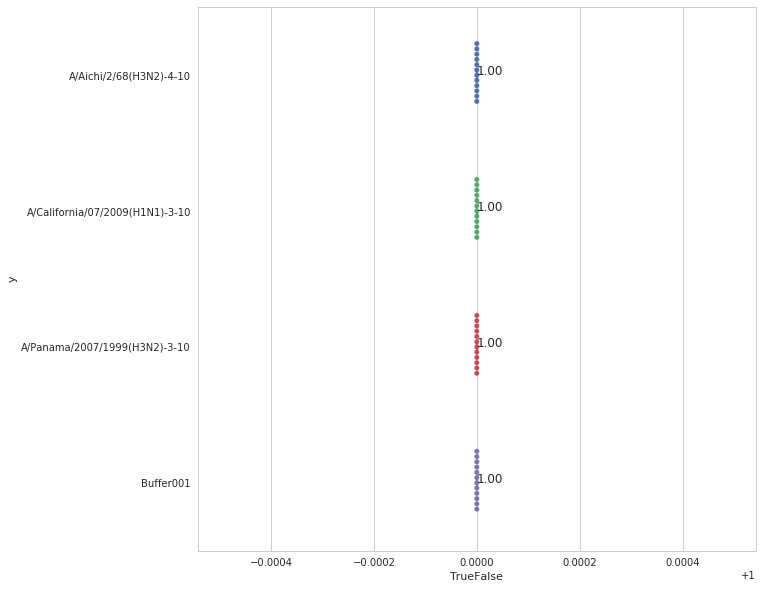

In [143]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))
#ax = sns.boxplot(data=frame_NN,y="y",x="TrueFalse",notch=True)
ax = sns.pointplot(data=frame_DT,y="y",x="TrueFalse",ci=None, join=False,hue="y", markers="|",)
for c in ax.collections:
    for of in c.get_offsets():
        ax.annotate("{:.2f}".format(of[0]), of)
        
ax = sns.swarmplot(data=frame_DT,y="y",x="TrueFalse")#, jitter=0.5)#, aspect=0.8)
ax.legend_.remove()

## Logistic Regression

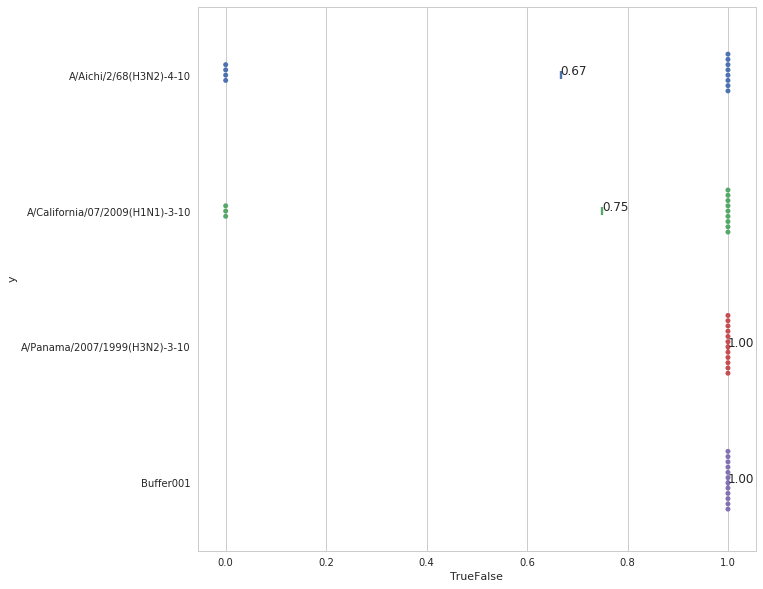

In [144]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))
#ax = sns.boxplot(data=frame_NN,y="y",x="TrueFalse",notch=True)
ax = sns.pointplot(data=frame_LR,y="y",x="TrueFalse",ci=None, join=False,hue="y", markers="|",)
for c in ax.collections:
    for of in c.get_offsets():
        ax.annotate("{:.2f}".format(of[0]), of)
        
ax = sns.swarmplot(data=frame_LR,y="y",x="TrueFalse")#, jitter=0.5)#, aspect=0.8)
ax.legend_.remove()
